In [1]:
import pandas as pd
import nltk
import warnings
warnings.filterwarnings('ignore')
# nltk.download(['punkt', 'stopwords'])

In [2]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_lg')

In [3]:
email_data=pd.read_csv("spam_ham_dataset.csv")

In [4]:
email_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [14]:
# txt = email_data.text[20]
# doc = nlp(txt)
# displacy.render(doc, style='ent', jupyter=True)

In [10]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [12]:
email_data.drop(['Unnamed: 0','label'],axis=1,inplace=True)

In [13]:
dupli = email_data.duplicated(subset=['text'], keep=False)
dupli_table = email_data[dupli].sort_values(by='text')
dupli_table[['text', 'label_num']]

,text,label_num
1130,Subject: \r\n,1
4748,Subject: \r\n,1
363,Subject: \r\n,1
3610,Subject: \r\n,1
182,Subject: \r\n,1
...,...,...
3225,Subject: you can be smart !\r\n,1
2408,Subject: you can be smart !\r\n,1
3933,Subject: you can be smart !\r\n,1
5032,"Subject: your contact info\r\n? "" ? ? ? ? ? ...",1


In [15]:
email_data_nodup = email_data.drop_duplicates()

dupli = email_data_nodup.duplicated(subset=['text'], keep=False)
dupli_table = email_data_nodup[dupli].sort_values(by='text')
dupli_table

,text,label_num


In [17]:
email_data_nodup

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5165,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5169,Subject: industrial worksheets for august 2000...,0


In [19]:
email_data_nodup.text[0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(email_data_nodup, test_size=0.2, stratify=email_data_nodup['label_num'])

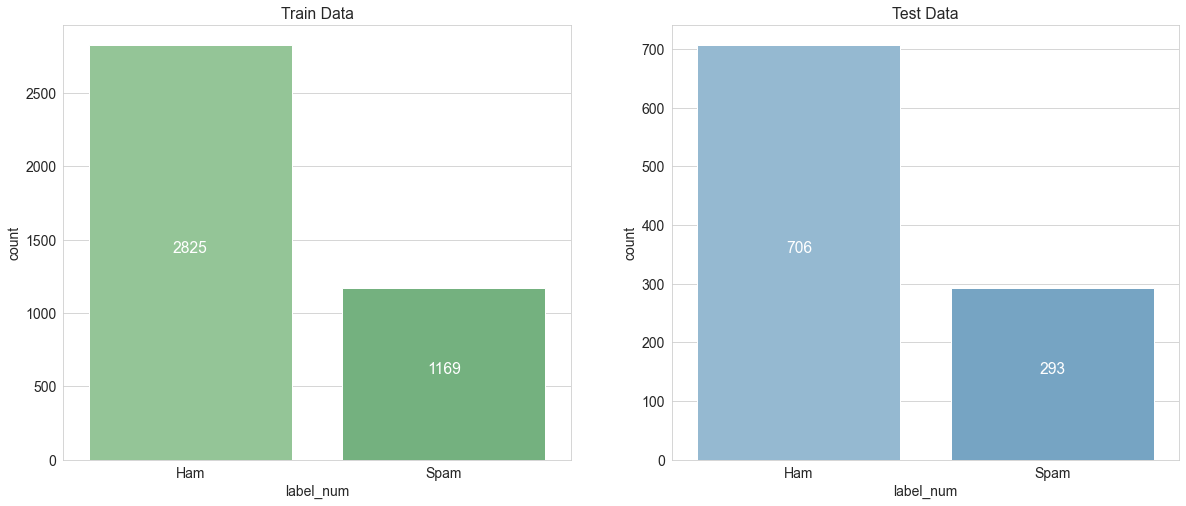

In [21]:
from functions import train_test_labels_dist

train_test_labels_dist(train_data=train, test_data=test, target='label_num')

In [22]:
train = train.reset_index(drop=True)
train

,text,label_num
0,Subject: increase your sperm volume by 500 %\r...,1
1,"Subject: re : flow volumes at oxy gladewater ,...",0
2,"Subject: photoshop , windows , office . cheap ...",1
3,Subject: re : june 00 production - o ' connor ...,0
4,"Subject: 1497\r\ndaren ,\r\nates shows that yo...",0
...,...,...
3989,Subject: impress her with a hard erection . . ...,1
3990,"Subject: enjoy it\r\ngeneric viagra , at cheap...",1
3991,Subject: do you feel safe as an american ?\r\n...,1
3992,Subject: re : potential list fo 9 / 00\r\ncorr...,0


In [9]:
# nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
# from nlpaug.augmenter.word import ContextualWordEmbsAug
# aug = ContextualWordEmbsAug(aug_max=2, action='insert')
# aug.augment("Misleading reviews. Worst coffee ever had, and sorely disappointing vibe.", n=5)

['misleading outside reviews. worst coffee ever had, and sorely disappointing that vibe.',
 'misleading glowing reviews. worst coffee ever had, poor and sorely disappointing vibe.',
 'misleading bad reviews. arguably worst coffee ever had, and sorely disappointing vibe.',
 'misleading reviews. worst coffee ever ever had, and sorely a disappointing vibe.',
 'misleading reviews. worst coffee we ever had, and also sorely disappointing vibe.']

In [23]:
import re
def cleaning(s):
    s=str(s)
    s=s.replace('Subject:', ' ') \
        .replace('re :', ' ') \
        .replace('fw :', ' ')
    s=s.lower()
    s=re.sub(r'\W',' ',s)
    s = s.split()
    s = " ".join(s)
    return s

In [24]:
train['clean_text']=train['text'].apply(cleaning)

In [25]:
train['clean_text'][4]

'1497 daren ates shows that your team has one specialist for 1497 in january and february please let me know if ates is incorrect for the month of january and february if there is a specialist in your team we have not received a survey from this person this lack of information prevents your expenses from being 100 allocated out to the commercial teams please fill out the following survey and return it to me asap if you have any questions please call me at 3 3859 thanks shari'

In [40]:
# from nlpaug.augmenter.word import ContextualWordEmbsAug
# context_aug = ContextualWordEmbsAug(aug_max=2, action='insert')

In [41]:
# context_aug.augment(train['clean_text'][4], n=2)

['19 and readyyet click only here to be digitally removed',
 '19 and the readyyet click here else to be removed']

In [42]:
# context_aug.augment(train.clean_text[11], n=2)

['round back action click box here are to be removed',
 'round back action click here changed to or be removed']

In [26]:
train['length'] = train['clean_text'].apply(len)
train

,text,label_num,clean_text,length
0,Subject: increase your sperm volume by 500 %\r...,1,increase your sperm volume by 500 spur m is th...,490
1,"Subject: re : flow volumes at oxy gladewater ,...",0,flow volumes at oxy gladewater meter 98926 mar...,556
2,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main trending a...,386
3,Subject: re : june 00 production - o ' connor ...,0,june 00 production o connor hewitt ltd forward...,859
4,"Subject: 1497\r\ndaren ,\r\nates shows that yo...",0,1497 daren ates shows that your team has one s...,478
...,...,...,...,...
3989,Subject: impress her with a hard erection . . ...,1,impress her with a hard erection midband good ...,817
3990,"Subject: enjoy it\r\ngeneric viagra , at cheap...",1,enjoy it generic viagra at cheap prices most p...,363
3991,Subject: do you feel safe as an american ?\r\n...,1,do you feel safe as an american the election r...,1322
3992,Subject: re : potential list fo 9 / 00\r\ncorr...,0,potential list fo 9 00 correction that s meter...,976


In [28]:
train = train[train['length'] >= 10]
train

# train[train['length'] < 10]

,text,label_num,clean_text,length
0,Subject: increase your sperm volume by 500 %\r...,1,increase your sperm volume by 500 spur m is th...,490
1,"Subject: re : flow volumes at oxy gladewater ,...",0,flow volumes at oxy gladewater meter 98926 mar...,556
2,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main trending a...,386
3,Subject: re : june 00 production - o ' connor ...,0,june 00 production o connor hewitt ltd forward...,859
4,"Subject: 1497\r\ndaren ,\r\nates shows that yo...",0,1497 daren ates shows that your team has one s...,478
...,...,...,...,...
3989,Subject: impress her with a hard erection . . ...,1,impress her with a hard erection midband good ...,817
3990,"Subject: enjoy it\r\ngeneric viagra , at cheap...",1,enjoy it generic viagra at cheap prices most p...,363
3991,Subject: do you feel safe as an american ?\r\n...,1,do you feel safe as an american the election r...,1322
3992,Subject: re : potential list fo 9 / 00\r\ncorr...,0,potential list fo 9 00 correction that s meter...,976


In [30]:
from nlpaug.augmenter.word import ContextualWordEmbsAug
from tqdm import tqdm
context_aug = ContextualWordEmbsAug(aug_max=2, action='insert')

spam_text = train[train['label_num']==1]['clean_text']
augmented_text = []

for text in tqdm(spam_text):
    aug_text = context_aug.augment(text, n=1)
    augmented_text.append(aug_text)

100%|██████████| 1166/1166 [17:52<00:00,  1.09it/s]


In [32]:
spam_labels = [1] * len(augmented_text)

augmented_data = pd.DataFrame({'clean_text': augmented_text, 'label_num': spam_labels})
augmented_data

,clean_text,label_num
0,increase your sperm volume by 500 spur m is th...,1
1,photoshop windows office cheap main menu trend...,1
2,hii now online with profiles close to 1 millio...,1
3,ok new offshore pharmacy not a single medical ...,1
4,his lips his nose good day i tried to call you...,1
...,...,...
1161,find it at here hey glide it on feel it to get...,1
1162,impress her with a hard erection midband good ...,1
1163,enjoy it generic viagra at cheap prices most p...,1
1164,do you feel safe as an american the election r...,1


In [33]:
train = train[['clean_text', 'label_num']]
train

,clean_text,label_num
0,increase your sperm volume by 500 spur m is th...,1
1,flow volumes at oxy gladewater meter 98926 mar...,0
2,photoshop windows office cheap main trending a...,1
3,june 00 production o connor hewitt ltd forward...,0
4,1497 daren ates shows that your team has one s...,0
...,...,...
3989,impress her with a hard erection midband good ...,1
3990,enjoy it generic viagra at cheap prices most p...,1
3991,do you feel safe as an american the election r...,1
3992,potential list fo 9 00 correction that s meter...,0


In [34]:
main_data = pd.concat([train, augmented_data], axis=0)
main_data

,clean_text,label_num
0,increase your sperm volume by 500 spur m is th...,1
1,flow volumes at oxy gladewater meter 98926 mar...,0
2,photoshop windows office cheap main trending a...,1
3,june 00 production o connor hewitt ltd forward...,0
4,1497 daren ates shows that your team has one s...,0
...,...,...
1161,find it at here hey glide it on feel it to get...,1
1162,impress her with a hard erection midband good ...,1
1163,enjoy it generic viagra at cheap prices most p...,1
1164,do you feel safe as an american the election r...,1


In [35]:
main_data = main_data.reset_index(drop=True)
main_data

,clean_text,label_num
0,increase your sperm volume by 500 spur m is th...,1
1,flow volumes at oxy gladewater meter 98926 mar...,0
2,photoshop windows office cheap main trending a...,1
3,june 00 production o connor hewitt ltd forward...,0
4,1497 daren ates shows that your team has one s...,0
...,...,...
5151,find it at here hey glide it on feel it to get...,1
5152,impress her with a hard erection midband good ...,1
5153,enjoy it generic viagra at cheap prices most p...,1
5154,do you feel safe as an american the election r...,1


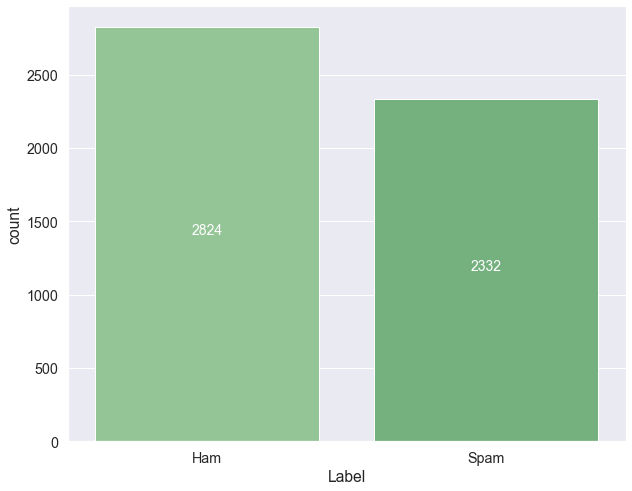

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams as rc
rc['figure.figsize'] = 10, 8
rc['font.size'] = 14

palette1 = sns.color_palette('Greens_d')

ax = sns.countplot(x='label_num', data=main_data, palette=palette1)
plt.xticks([0, 1], ["Ham", "Spam"])
plt.xlabel('Label')

grouped_main = main_data.groupby('label_num').count()

for index, row in grouped_main.iterrows():
    ax.text(row.name, row.clean_text/2, row.clean_text, color='white', ha='center')
plt.show()

In [37]:
main_data.to_csv('main_data.csv', index=None)
test.to_csv("test_data.csv", index=None)

In [2]:
main_data = pd.read_csv("main_data.csv")
main_data

,clean_text,label_num
0,increase your sperm volume by 500 spur m is th...,1
1,flow volumes at oxy gladewater meter 98926 mar...,0
2,photoshop windows office cheap main trending a...,1
3,june 00 production o connor hewitt ltd forward...,0
4,1497 daren ates shows that your team has one s...,0
...,...,...
5151,find it at here hey glide it on feel it to get...,1
5152,impress her with a hard erection midband good ...,1
5153,enjoy it generic viagra at cheap prices most p...,1
5154,do you feel safe as an american the election r...,1


In [3]:
duplicates = main_data.duplicated(subset=['clean_text'], keep=False)
duplicated_main = main_data[duplicates].sort_values(by='clean_text')
duplicated_main[['clean_text', 'label_num']]

,clean_text,label_num
1419,04 01 assignment termination expiration report...,0
940,04 01 assignment termination expiration report...,0
3284,april 2001 spot purchases vance deals for the ...,0
1076,april 2001 spot purchases vance deals for the ...,0
317,april nominations at shell deer park forwarded...,0
...,...,...
1254,urgent ed has requested that we compile a list...,0
90,wellhead adjustments the attached spreadsheet ...,0
2602,wellhead adjustments the attached spreadsheet ...,0
1759,wellhead volumes daren please click on the sup...,0


In [4]:
main_data_nodup = main_data.drop_duplicates()

duplicates = main_data_nodup.duplicated(subset=['clean_text'], keep=False)
duplicated_main = main_data_nodup[duplicates].sort_values(by='clean_text')
duplicated_main[['clean_text', 'label_num']]

,clean_text,label_num


In [18]:
main_data_nodup.isnull().sum()

clean_text    0
label_num     0
dtype: int64

In [6]:
# import spacy
# spacy.cli.download('en_core_web_lg')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [5]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [8]:
doc = nlp("4 47 pm")
print([token.text for token in doc])

['4', '47', 'pm']


In [12]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
pattern = [{'IS_DIGIT': True}, {'IS_DIGIT': True}, {'LOWER':{'REGEX': "^[ap]m$"}}]
matcher.add('CUSTOM_TIME', [pattern])

In [23]:
text = main_data_nodup['clean_text'][25]

doc = nlp(text)
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])

[4 20 pm, 3 39 pm, 3 38 pm]


In [14]:
text = main_data_nodup['clean_text'][25]

doc = nlp(text)
spacy.displacy.render(doc, style='ent')

In [60]:
pattern = re.compile(r'\d{1} \d{2} [a-z]{2}')
re.findall(pattern, main_data_nodup.clean_text[25])

['4 20 pm', '3 39 pm', '3 38 pm']

In [42]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [61]:
spacy.cli.download('en_core_web_md')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [41]:
ruler = nlp.add_pipe('entity_ruler', before='ner')
ruler.add_patterns([{"label":"CUSTOM_TIME",
                     "pattern":[{'IS_DIGIT': True}, {'IS_DIGIT': True}, {'LOWER':{'REGEX': "^[ap]m$"}}]}])
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'entity_ruler',
 'ner']

In [40]:
# nlp.remove_pipe('entity_ruler')

('entity_ruler', <spacy.pipeline.entityruler.EntityRuler at 0x157d01d0f88>)

In [50]:
spacy.displacy.render(nlp(main_data_nodup.clean_text[25]), style='ent')

In [46]:
import re
def concat_words(s):
    doc_ents = nlp(s).ents

    tagged_text = s
    for tag in doc_ents:
        tagged_text = re.sub(tag.text, "_".join(tag.text.split()), tagged_text)

    return tagged_text


In [47]:
tag_text = concat_words(main_data_nodup['clean_text'][25])
print(tag_text)

killing ena to ena deals in sitara i talked to matt we ll zero these deals out as opposed to killing them thanks original message from jaquet tammy sent thursday_december_13_2001 4_20_pm to farmer daren j heal kevin_kinsey_lisa_lamadrid_victor_smith george_f_sullivan_patti cc superty robert subject killing ena to ena deals in sitara original message from pena_matt sent thursday_december_13_2001 3_39_pm to krishnaswamy_jayant_pinion richard jaquet tammy_cc_severson russ_truong_dat_aybar_luis_ma_felicia subject killing ena to ena deals in sitara thanks jay_tammy_richard you may want to let the schedulers know although they may already original message from krishnaswamy_jayant sent thursday_december_13_2001 3_38_pm to pinion richard jaquet tammy_cc_severson russ_pena_matt_truong_dat_aybar_luis_ma_felicia subject killing ena to ena deals in sitara richars tammy we will be killing about_2000 deals in sitara tonight whenever a deal is touched in sitara it will bridge over to unify these are 

In [48]:
main_data_nodup['good_text'] = main_data_nodup['clean_text'].apply(concat_words)

In [49]:
main_data_nodup.good_text[25]

'killing ena to ena deals in sitara i talked to matt we ll zero these deals out as opposed to killing them thanks original message from jaquet tammy sent thursday_december_13_2001 4_20_pm to farmer daren j heal kevin_kinsey_lisa_lamadrid_victor_smith george_f_sullivan_patti cc superty robert subject killing ena to ena deals in sitara original message from pena_matt sent thursday_december_13_2001 3_39_pm to krishnaswamy_jayant_pinion richard jaquet tammy_cc_severson russ_truong_dat_aybar_luis_ma_felicia subject killing ena to ena deals in sitara thanks jay_tammy_richard you may want to let the schedulers know although they may already original message from krishnaswamy_jayant sent thursday_december_13_2001 3_38_pm to pinion richard jaquet tammy_cc_severson russ_pena_matt_truong_dat_aybar_luis_ma_felicia subject killing ena to ena deals in sitara richars tammy we will be killing about_2000 deals in sitara tonight whenever a deal is touched in sitara it will bridge over to unify these are

In [51]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

main_data_nodup['good_text']=main_data_nodup['good_text'].apply(word_tokenize)
main_data_nodup['good_text']=main_data_nodup['good_text'].apply(lambda x:[word for word in x if word not in set(stopwords.words('english'))])
main_data_nodup['good_text']=main_data_nodup['good_text'].apply(lambda x:' '.join(x))

In [52]:
main_data_nodup.good_text[25]

'killing ena ena deals sitara talked matt zero deals opposed killing thanks original message jaquet tammy sent thursday_december_13_2001 4_20_pm farmer daren j heal kevin_kinsey_lisa_lamadrid_victor_smith george_f_sullivan_patti cc superty robert subject killing ena ena deals sitara original message pena_matt sent thursday_december_13_2001 3_39_pm krishnaswamy_jayant_pinion richard jaquet tammy_cc_severson russ_truong_dat_aybar_luis_ma_felicia subject killing ena ena deals sitara thanks jay_tammy_richard may want let schedulers know although may already original message krishnaswamy_jayant sent thursday_december_13_2001 3_38_pm pinion richard jaquet tammy_cc_severson russ_pena_matt_truong_dat_aybar_luis_ma_felicia subject killing ena ena deals sitara richars tammy killing about_2000 deals sitara tonight whenever deal touched sitara bridge unify desk 2 desk deals minimal impact'

In [53]:
main_data_nodup.to_csv("main_data_nodup.csv", index=None)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(min_df=2, max_df=0.7)
X=tfidf.fit_transform(email_data['text']).toarray()
y=email_data['label_num']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
X_train.shape

(4136, 45595)

In [19]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
y_pred=nb_clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score as ac
ac(y_test,y_pred)

0.9536231884057971

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred1=lr.predict(X_test)

In [24]:
ac(y_test,y_pred1)

0.9874396135265701